# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

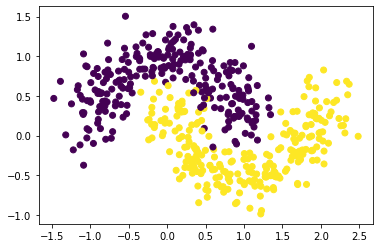

In [6]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=1000, tol=1e-3, solver='liblinear', max_iter=200)
svm = SVC(kernel='linear', C=100, tol=1e-3)

In [10]:
def plot_decisions(clf, name_of_clf, X, y):
  clf.fit(X, y)
  plt.figure(figsize=(10, 8))
  plot_decision_regions(X=X, y=y, clf=clf, legend=1)
  y_predict = clf.predict(X)
  plt.title(f"{name_of_clf}: accuracy = {accuracy_score(y, y_predict)}")
  plt.show()

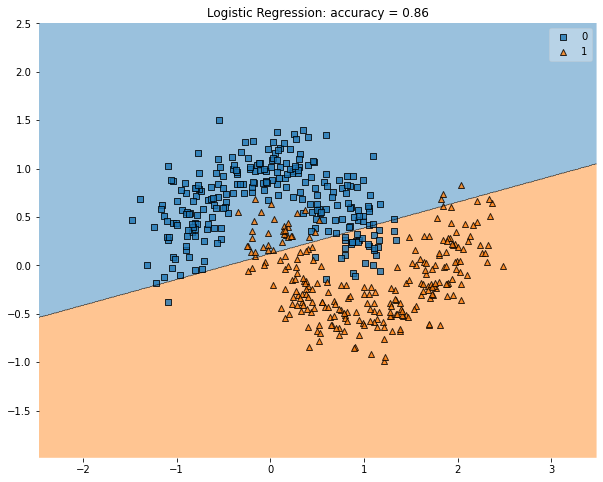

In [11]:
plot_decisions(lr, "Logistic Regression", moons_points, moons_labels)

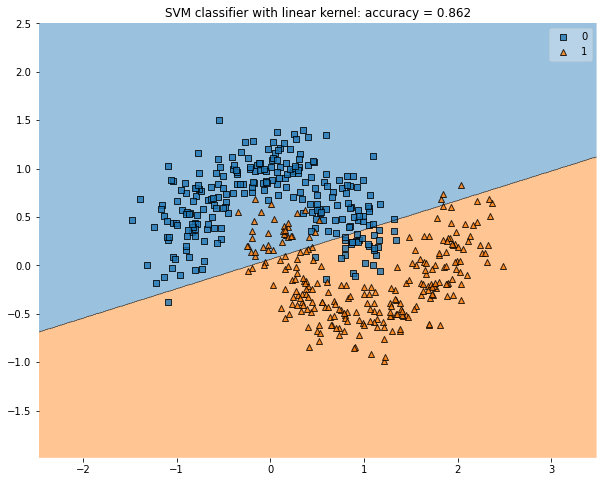

In [12]:
plot_decisions(svm, "SVM classifier with linear kernel", moons_points, moons_labels)

The samples are linearly indistinguishable, so the result is the same. I use the accuracy metric, because classes are balanced. After selecting the hyperparameters, we managed to get the metric value of 0.862, but since the sample itself is not linearly separable, further selection will not greatly improve the result - you need to go to the space where the classes are linearly separable.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [13]:
from sklearn.model_selection import GridSearchCV

Let's define some useful function:

In [14]:
def best_results(clf):
  print(f"Best CV_accuracy is: {clf.best_score_}")
  for key, value in clf.best_params_.items():
    print(f"Best {key} is: {value}")

Selection of hyperparameters for a polynomial kernel:

In [15]:
parameters = {"degree": [3, 4, 5, 6, 7, 8],
              "coef0": [0.5, 0.6, 0.7, 0.8, 0.9],
              "C": [100, 1000, 10000]}
poly_svm = SVC(kernel='poly', tol=1e-3)
clf = GridSearchCV(poly_svm, parameters, cv=3)
clf.fit(moons_points, moons_labels)
best_results(clf)

Best CV_accuracy is: 0.9799918235817522
Best C is: 100
Best coef0 is: 0.7
Best degree is: 4


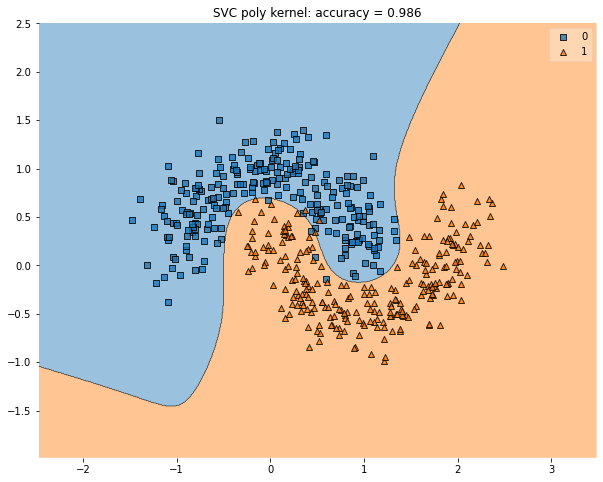

In [16]:
poly_svm = SVC(kernel='poly', C=100, tol=1e-3, coef0=0.7, degree=4)
plot_decisions(poly_svm, "SVC poly kernel", moons_points, moons_labels)

Selection of hyperparameters for rbf kernel:

In [17]:
parameters = {"C": [1, 10, 100, 1000, 10000],
              "tol": [1e-4, 1e-3, 1e-2]}
rbf_svm = SVC(kernel='rbf')
clf = GridSearchCV(rbf_svm, parameters, cv=2)
clf.fit(moons_points, moons_labels)
best_results(clf)

Best CV_accuracy is: 0.98
Best C is: 100
Best tol is: 0.0001


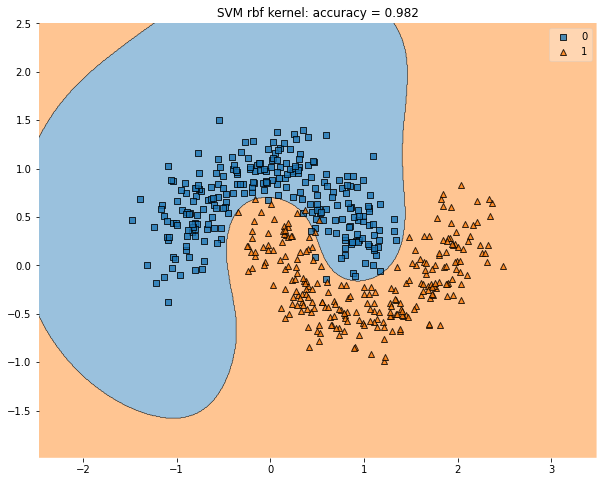

In [18]:
rbf_svm = SVC(kernel='rbf', C=100, tol=1e-4)
plot_decisions(rbf_svm, "SVM rbf kernel", moons_points, moons_labels)

Selection of hyperparameters for sigmoid kernel

In [21]:
parameters = {"coef0": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
              "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
sigmoid_svm = SVC(kernel='sigmoid', tol=1e-4)
clf = GridSearchCV(sigmoid_svm, parameters, cv=2)
clf.fit(moons_points,moons_labels)
best_results(clf)

Best CV_accuracy is: 0.79
Best C is: 1e-05
Best coef0 is: 0.6


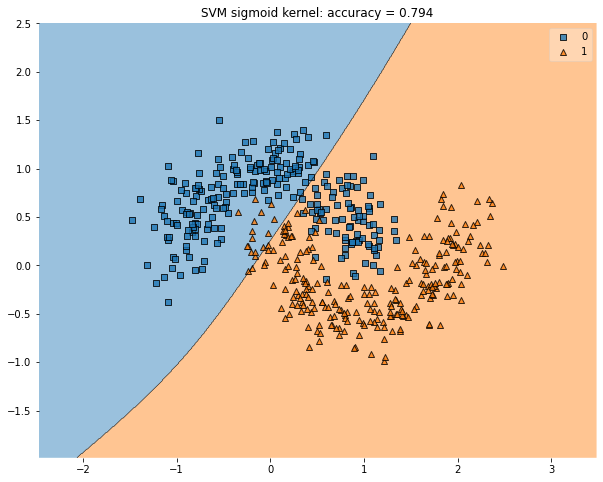

In [23]:
sigmoid_svm = SVC(kernel='sigmoid', C=1e-5, coef0=0.6, tol=1e-4, gamma='auto')
plot_decisions(sigmoid_svm, 'SVM sigmoid kernel', moons_points, moons_labels)

The quality of classification both in terms of metrics and visualization of the division into classes has greatly increased for the polynomial and rbf kernels, because due to the nonlinearity of the separating surfaces, they are able to better describe the distribution of objects of each class than in the linear case.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=8)
lr = LogisticRegression(C=1e4, tol=1e-3, solver='liblinear', max_iter=200)
pipeline = make_pipeline(poly, lr)

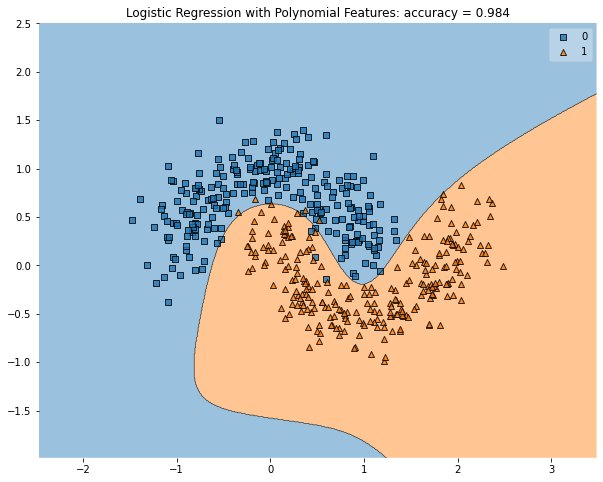

In [25]:
plot_decisions(pipeline,'Logistic Regression with Polynomial Features', moons_points, moons_labels)

The quality of the LR classification for a dataset with generated features (accuracy=0.984) is almost the same as for SVM with a polynomial kernel (accuracy=0.986) and it is better than for SVM with other types of kernels. It should have turned out that way, because both approaches use the transition to the space of polynomial combinations of features.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

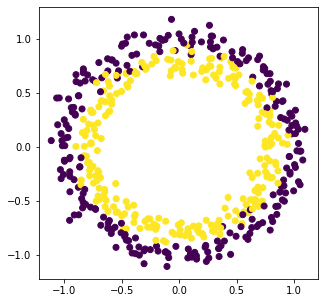

In [26]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

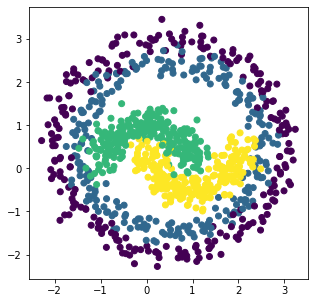

In [27]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

***Circles***

Manually selected hyperparameters for LR with polynomial features and SVM with different types of kernels, at which the maximum metric values are achieved. These models achieved high classification accuracy (95-99%), but at the same time identified areas where there are no objects from the training set at all.

In [28]:
poly = PolynomialFeatures(degree=30)
lr = LogisticRegression(C=1e4, tol=1e-3, solver="liblinear", max_iter=500)
pipeline = make_pipeline(poly, lr)

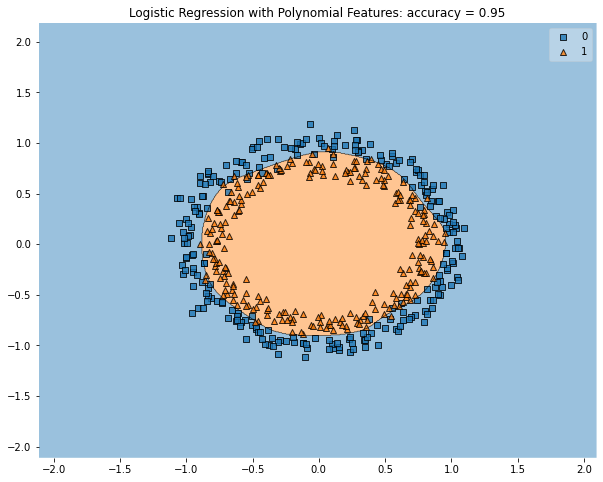

In [29]:
plot_decisions(pipeline, 'Logistic Regression with Polynomial Features', circles_points, circles_labels)

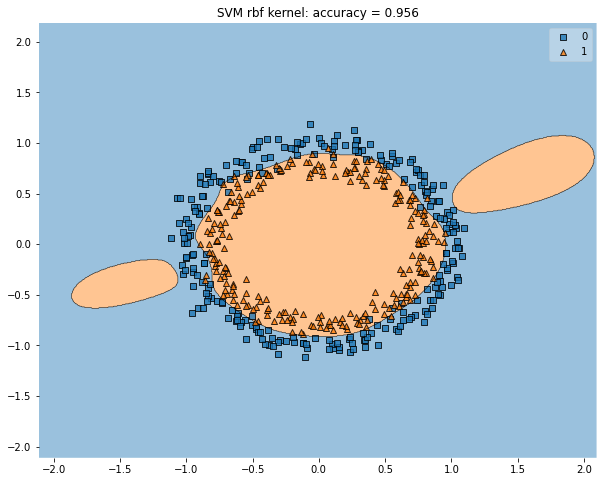

In [30]:
clf = SVC(kernel='rbf', C=1e6, tol=1e-4)
plot_decisions(clf, "SVM rbf kernel", circles_points, circles_labels)

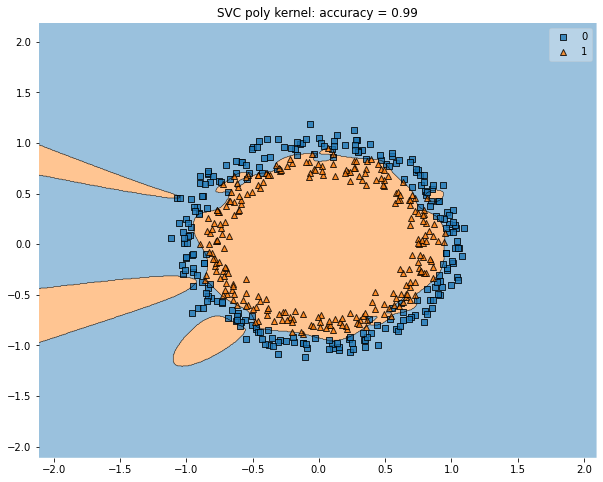

In [31]:
svm_p = SVC(kernel='poly', coef0=0.5, degree=25, C=1e4, tol=1e-4)
plot_decisions(svm_p, "SVC poly kernel", circles_points, circles_labels)

I use gradient boosting to achieve better classification quality

In [33]:
# !pip install catboost
from catboost import CatBoostClassifier

Using gridsearch, I select the optimal hyperparameters

In [34]:
catboost_clf = CatBoostClassifier(iterations = 500, eval_metric="Accuracy", logging_level='Silent')
grid = {'depth': np.linspace(10, 60, 10)}
grid_search = catboost_clf.grid_search(grid, circles_points, circles_labels)
print(f"Best parameters of grid_search is: {grid_search}")

0:	loss: 0.9600000	best: 0.9600000 (0)	total: 7.32s	remaining: 1m 5s
Estimating final quality...
Best parameters of grid_search is: {'params': {'depth': 10.0}, 'cv_results': defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 17

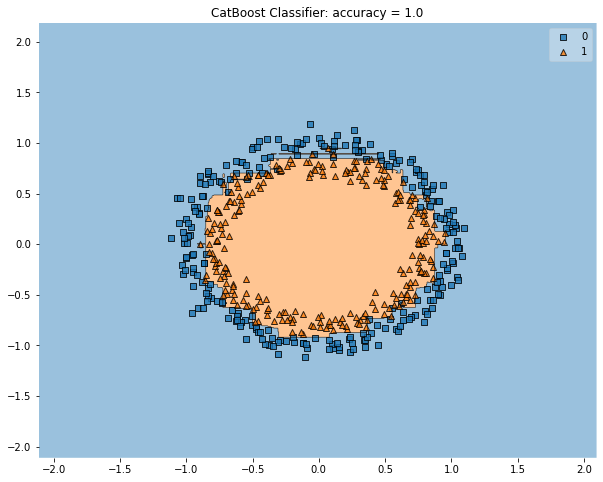

In [35]:
catboost_clf = CatBoostClassifier(max_depth=10, l2_leaf_reg=0.7, logging_level='Silent')
plot_decisions(catboost_clf, "CatBoost Classifier", circles_points, circles_labels)

By visualization and by the value of the metric (100% classification accuracy), CatBoost Classifier did an almost perfect job.

***Complex circles***

The best accuracy value from the proposed models was obtained when using SVM with a polynomial kernel of 8 degrees (0.952), CatBoostClassifier reached accuracy=1.0

/home/ziyobek/.local/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


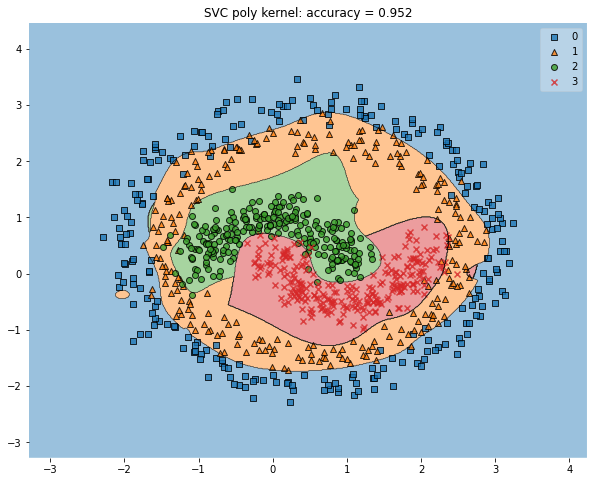

In [38]:
poly_svm = SVC(kernel='poly', coef0=0.5, degree=8, C=1e4, tol=1e-4)
plot_decisions(poly_svm, "SVC poly kernel", points, labels)

/home/ziyobek/.local/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


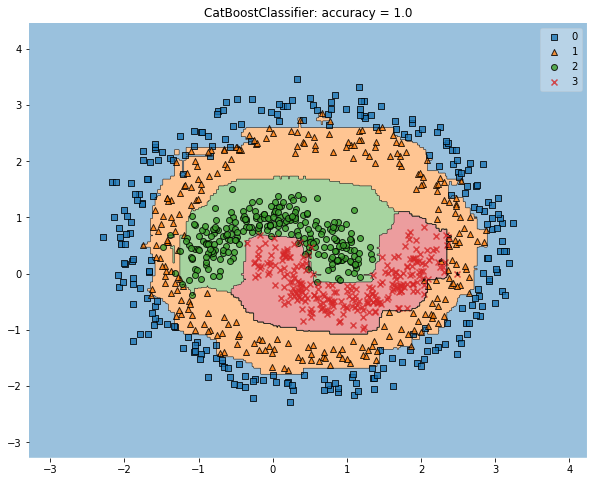

In [39]:
clf = CatBoostClassifier(max_depth=10, logging_level='Silent')
plot_decisions(clf, "CatBoostClassifier", points, labels)

By fitting hyperparameters, it is possible to achieve high accuracy of Kernel SVM classification and log regression with polynomial features even on complex data distributions, but more advanced models, such as gradient boosting on decision trees, show better results.